In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
usgs_luindex = usgs_file.LU_INDEX.isel(time=5)
wur_luindex = wur_file.LU_INDEX.isel(time=5)
wur_lcz_luindex = wur_lcz_file.LU_INDEX.isel(time=5)
modis_luindex = modis_file.LU_INDEX.isel(time=5)

In [4]:
lcz_lus = wur_lcz_file.LU_INDEX.where(wur_lcz_file.LU_INDEX > 51, np.nan, 1)
lcz_lu = lcz_lus.isel(time=5)

wur_lus = wur_file.LU_INDEX.where(wur_file.LU_INDEX == 1)
wur_lu = wur_lus.isel(time=5)

In [9]:
wur_urbanT = wur_var.where(wur_lus == 1)
lcz_urbanT = wur_lcz_var.where(lcz_lus > 1)

mean_urban_wur = wur_urbanT.mean(dim=("west_east", "south_north"))
mean_urban_lcz = lcz_urbanT.mean(dim=("west_east", "south_north"))

In [10]:
wur_rural = wur_var.where(wur_lus != 1)
lcz_rural = wur_lcz_var.where(np.isnan(lcz_lus))

wur_rural = wur_rural.where(wur_file.LANDMASK == 1)
lcz_rural = lcz_rural.where(wur_lcz_file.LANDMASK == 1)

mean_rural_wur = wur_rural.mean(dim=("west_east", "south_north"))
mean_rural_lcz = lcz_rural.mean(dim=("west_east", "south_north"))

In [13]:
from matplotlib.lines import Line2D

means = wur_lcz_var.mean(dim=("west_east", "south_north"))
mins = wur_lcz_var.min(dim=("west_east", "south_north"))
maxs = wur_lcz_var.max(dim=("west_east", "south_north"))

means_wur = wur_var.mean(dim=("west_east", "south_north"))
mins_wur = wur_var.min(dim=("west_east", "south_north"))
maxs_wur = wur_var.max(dim=("west_east", "south_north"))

means_modis = modis_var.mean(dim=("west_east", "south_north"))
mins_modis = modis_var.min(dim=("west_east", "south_north"))
maxs_modis = modis_var.max(dim=("west_east", "south_north"))

means_usgs = usgs_var.mean(dim=("west_east", "south_north"))
mins_usgs = usgs_var.min(dim=("west_east", "south_north"))
maxs_usgs = usgs_var.max(dim=("west_east", "south_north"))

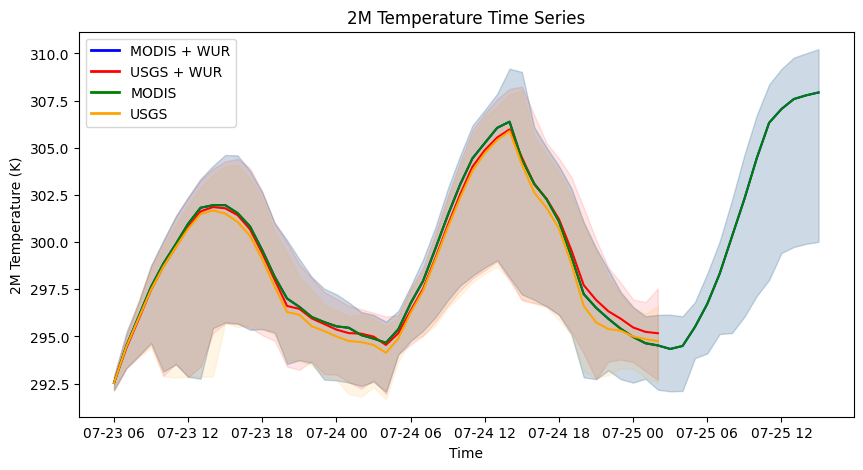

In [14]:
fig2, ax2 = plt.subplots(figsize=(10, 5))
lines = ax2.plot(means.time.values, means, linestyle="-", color="blue", linewidth=1.5)
ax2.fill_between(means.time.values, mins, maxs, alpha=0.1, color="blue")

lines = ax2.plot(
    means_wur.time.values, means_wur, linestyle="-", color="red", linewidth=1.5
)
ax2.fill_between(means_wur.time.values, mins_wur, maxs_wur, alpha=0.1, color="red")

lines = ax2.plot(
    means_modis.time.values, means_modis, linestyle="-", color="green", linewidth=1.5
)
ax2.fill_between(
    means_modis.time.values, mins_modis, maxs_modis, alpha=0.1, color="green"
)

lines = ax2.plot(
    means_usgs.time.values, means_usgs, linestyle="-", color="orange", linewidth=1.5
)
ax2.fill_between(
    means_usgs.time.values, mins_usgs, maxs_usgs, alpha=0.1, color="orange"
)

ax2.set_xlabel("Time")
ax2.set_ylabel("2M Temperature (K)")
plt.title("2M Temperature Time Series")

# Add legend
legend_elements = [
    Line2D([0], [0], linestyle="-", color="blue", lw=2, label="MODIS + WUR"),
    Line2D([0], [0], linestyle="-", color="red", lw=2, label="USGS + WUR"),
    Line2D([0], [0], linestyle="-", color="green", lw=2, label="MODIS"),
    Line2D([0], [0], linestyle="-", color="orange", lw=2, label="USGS"),
]
ax2.legend(handles=legend_elements, loc="upper left")

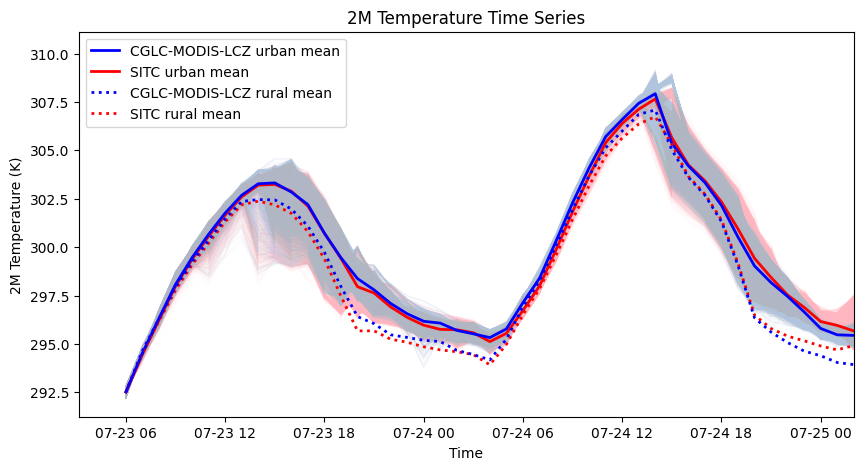

In [15]:
fig2, ax2 = plt.subplots(figsize=(10, 5))

for i in range(wur_urbanT.shape[1]):
    for j in range(wur_urbanT.shape[2]):
        ax2.plot(
            wur_urbanT.time.values,
            wur_urbanT[:, i, j],
            color="lightpink",
            linewidth=0.1,
            alpha=0.2,
        )

for i in range(lcz_urbanT.shape[1]):
    for j in range(lcz_urbanT.shape[2]):
        ax2.plot(
            lcz_urbanT.time.values,
            lcz_urbanT[:, i, j],
            color="lightsteelblue",
            linewidth=0.1,
            alpha=0.2,
        )

lines2 = ax2.plot(
    mean_urban_wur.time.values, mean_urban_wur, linestyle="-", color="red", linewidth=2
)
lines3 = ax2.plot(
    mean_urban_lcz.time.values, mean_urban_lcz, linestyle="-", color="blue", linewidth=2
)
lines4 = ax2.plot(
    mean_rural_wur.time.values, mean_rural_wur, linestyle=":", color="red", linewidth=2
)
lines5 = ax2.plot(
    mean_rural_lcz.time.values, mean_rural_lcz, linestyle=":", color="blue", linewidth=2
)

ax2.set_xlabel("Time")
ax2.set_ylabel("2M Temperature (K)")
ax2.set_xlim(right=wur_urbanT.time.values[-1])
plt.title("2M Temperature Time Series")

# Add legend
legend_elements = [
    Line2D(
        [0], [0], linestyle="-", color="blue", lw=2, label="CGLC-MODIS-LCZ urban mean"
    ),
    Line2D([0], [0], linestyle="-", color="red", lw=2, label="SITC urban mean"),
    Line2D(
        [0], [0], linestyle=":", color="blue", lw=2, label="CGLC-MODIS-LCZ rural mean"
    ),
    Line2D([0], [0], linestyle=":", color="red", lw=2, label="SITC rural mean"),
]
ax2.legend(handles=legend_elements, loc="upper left")